In [1]:
import pandas as pd
import numpy as np

In [2]:
# plot
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# date
from datetime import datetime, date, time

# Data Preparation

## merge data

In [3]:
#import data (this price dataset has not been ffilled and adjusted for stocl split)
uncleanprice = pd.read_csv('uncleanprice.csv')
uncleanprice.head()

,gvkey,date,tic,ajexm,t.share,price,os.share
0,1078,20100131,ABT,1.0,124583688.0,52.94,1.546738e+09
1,1078,20100228,ABT,1.0,145547692.0,54.28,1.552643e+09
2,1078,20100331,ABT,1.0,193315098.0,52.68,1.552643e+09
3,1078,20100430,ABT,1.0,173553969.0,51.16,1.552643e+09
4,1078,20100531,ABT,1.0,209347194.0,47.56,1.543565e+09


In [4]:
#import data
ratio = pd.read_csv('ratio.csv')
ratio.head()

,gvkey,date,bm,pe_inc,ps,npm,roa,roe,roce,GProf,...,fcf_ocf,de_ratio,intcov_ratio,quick_ratio,sale_invcap,sale_equity,rd_sale,ptb,PEG_trailing,TICKER
0,1078,20100131,0.279,14.386,2.736,0.187,0.199,0.300,0.211,0.422,...,0.842,1.417,13.248,1.319,0.997,1.562,0.091,3.838,0.370,ABT
1,1078,20100228,0.273,14.710,2.739,0.187,0.190,0.285,0.200,0.381,...,0.850,1.291,13.285,1.536,0.900,1.346,0.095,3.687,0.277,ABT
2,1078,20100331,0.273,14.276,2.659,0.187,0.190,0.285,0.200,0.381,...,0.850,1.291,13.285,1.536,0.900,1.346,0.095,3.579,0.269,ABT
3,1078,20100430,0.273,13.864,2.582,0.187,0.190,0.285,0.200,0.381,...,0.850,1.291,13.285,1.536,0.900,1.346,0.095,3.475,0.261,ABT
4,1078,20100531,0.257,13.988,2.313,0.167,0.193,0.259,0.199,0.405,...,0.866,1.390,14.121,1.296,0.975,1.495,0.094,3.519,0.228,ABT


In [5]:
#merge two dataframes
df = pd.merge(ratio, uncleanprice, on = ['gvkey','date'])
df.head()

,gvkey,date,bm,pe_inc,ps,npm,roa,roe,roce,GProf,...,sale_equity,rd_sale,ptb,PEG_trailing,TICKER,tic,ajexm,t.share,price,os.share
0,1078,20100131,0.279,14.386,2.736,0.187,0.199,0.300,0.211,0.422,...,1.562,0.091,3.838,0.370,ABT,ABT,1.0,124583688.0,52.94,1.546738e+09
1,1078,20100228,0.273,14.710,2.739,0.187,0.190,0.285,0.200,0.381,...,1.346,0.095,3.687,0.277,ABT,ABT,1.0,145547692.0,54.28,1.552643e+09
2,1078,20100331,0.273,14.276,2.659,0.187,0.190,0.285,0.200,0.381,...,1.346,0.095,3.579,0.269,ABT,ABT,1.0,193315098.0,52.68,1.552643e+09
3,1078,20100430,0.273,13.864,2.582,0.187,0.190,0.285,0.200,0.381,...,1.346,0.095,3.475,0.261,ABT,ABT,1.0,173553969.0,51.16,1.552643e+09
4,1078,20100531,0.257,13.988,2.313,0.167,0.193,0.259,0.199,0.405,...,1.495,0.094,3.519,0.228,ABT,ABT,1.0,209347194.0,47.56,1.543565e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51424 entries, 0 to 51423
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gvkey           51424 non-null  int64  
 1   date            51424 non-null  int64  
 2   bm              48175 non-null  float64
 3   pe_inc          50123 non-null  float64
 4   ps              44080 non-null  float64
 5   npm             44080 non-null  float64
 6   roa             51021 non-null  float64
 7   roe             46409 non-null  float64
 8   roce            50821 non-null  float64
 9   GProf           51190 non-null  float64
 10  totdebt_invcap  50207 non-null  float64
 11  debt_ebitda     50958 non-null  float64
 12  ocf_lct         50984 non-null  float64
 13  fcf_ocf         22285 non-null  float64
 14  de_ratio        51186 non-null  float64
 15  intcov_ratio    37120 non-null  float64
 16  quick_ratio     51090 non-null  float64
 17  sale_invcap     43418 non-null 

## change data type

In [7]:
# date, tring type
df["date"] = df["date"].astype(str)
df["gvkey"] = df["gvkey"].astype(str)

In [8]:
# regexp, extract year and month,yyyy-mm
df["date_ym"]= df["date"].str.extract(r'([0-9]{6})')
df["date_ym"] = df["date_ym"].str.split('([0-9]{4})([0-9]{2})').str.join('-').str.strip('-') #yyyy-mm
df["date_ym"]

0        2010-01
1        2010-02
2        2010-03
3        2010-04
4        2010-05
          ...   
51419    2019-08
51420    2019-09
51421    2019-10
51422    2019-11
51423    2019-12
Name: date_ym, Length: 51424, dtype: object

In [9]:
df["date_ym"].nunique()

120

##  deal with missing values

In [10]:
df.drop(['TICKER'], axis = 1, inplace = True)

In [11]:
#get the size of df before removing all missing value
df.shape

(51424, 28)

In [12]:
df.isna().sum()

gvkey                 0
date                  0
bm                 3249
pe_inc             1301
ps                 7344
npm                7344
roa                 403
roe                5015
roce                603
GProf               234
totdebt_invcap     1217
debt_ebitda         466
ocf_lct             440
fcf_ocf           29139
de_ratio            238
intcov_ratio      14304
quick_ratio         334
sale_invcap        8006
sale_equity        9844
rd_sale             213
ptb                3249
PEG_trailing      29741
tic                   0
ajexm                 0
t.share             225
price               111
os.share            121
date_ym               0
dtype: int64

Text(0.5, 1.0, 'number of missing values')

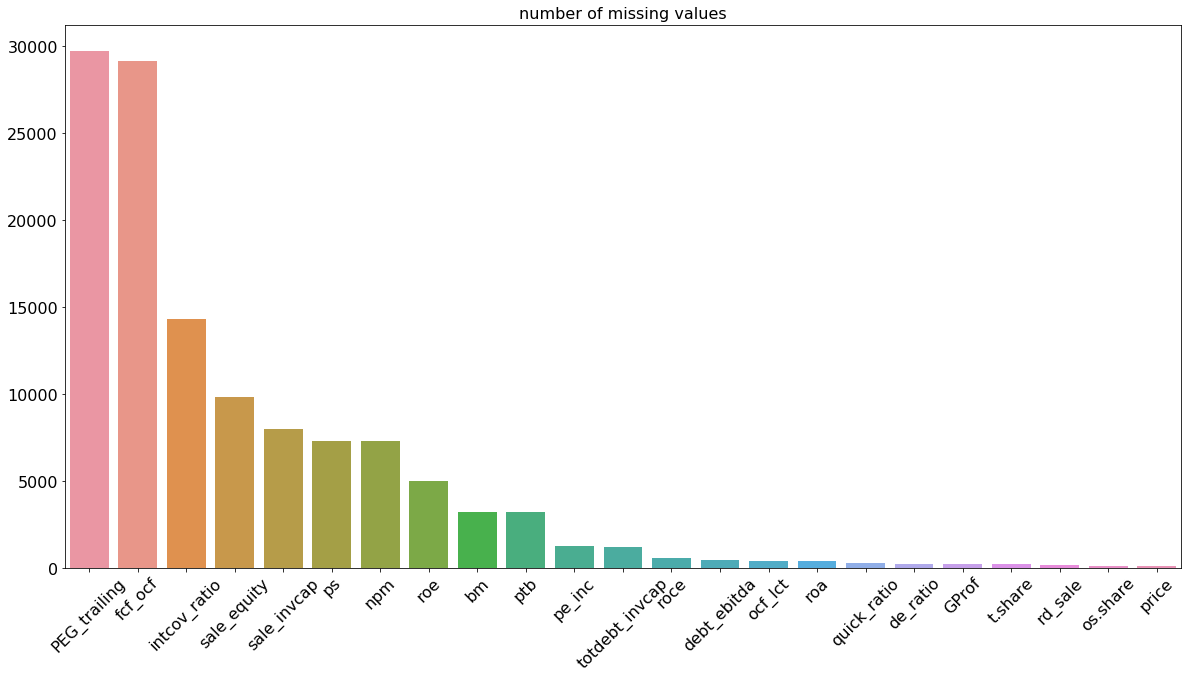

In [13]:
# plot the number of missing values
missing_value = df.isnull().sum().sort_values(ascending=False)
missing_value = missing_value[missing_value > 0]

# graph
plt.figure(figsize=(20, 10))
sns.barplot(x=missing_value.index,  y=missing_value)
plt.xticks(size=16, rotation=45)  # adjust size of x-axis
plt.yticks(size=16)
plt.title("number of missing values", size=16)

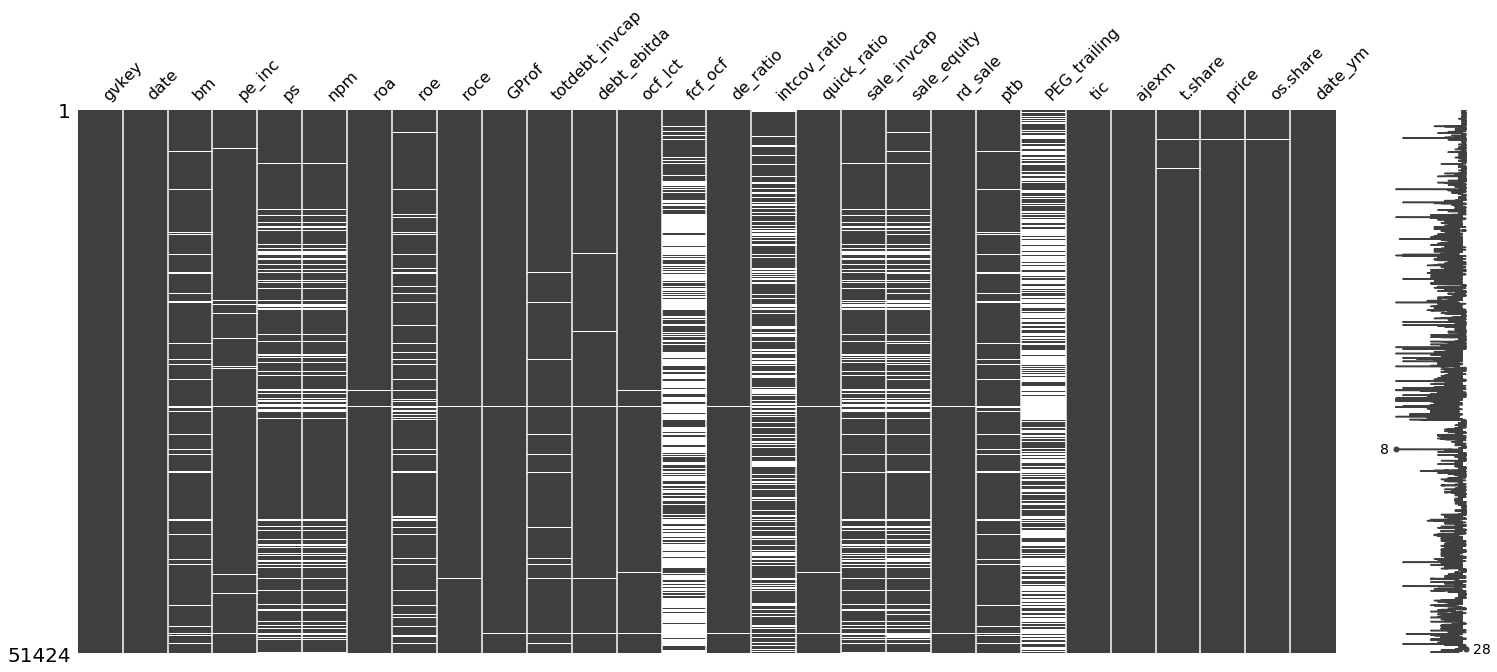

In [14]:
msno.matrix(df)

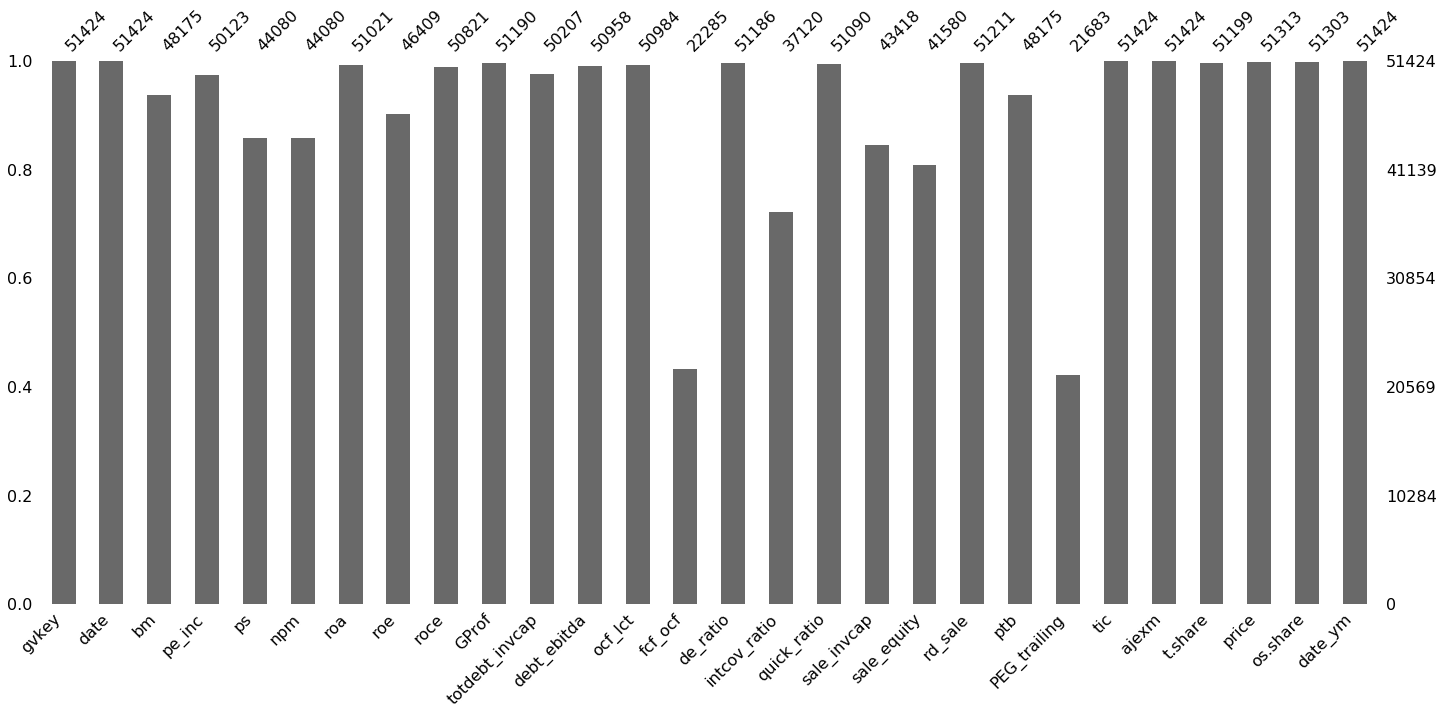

In [15]:
msno.bar(df)

In [19]:
#remove the missing values
#cleandf = df.dropna(how ='any')
cleandf = df

In [20]:
cleandf.isna().sum()

gvkey                 0
date                  0
bm                 3249
pe_inc             1301
ps                 7344
npm                7344
roa                 403
roe                5015
roce                603
GProf               234
totdebt_invcap     1217
debt_ebitda         466
ocf_lct             440
fcf_ocf           29139
de_ratio            238
intcov_ratio      14304
quick_ratio         334
sale_invcap        8006
sale_equity        9844
rd_sale             213
ptb                3249
PEG_trailing      29741
tic                   0
ajexm                 0
t.share             225
price               111
os.share            121
date_ym               0
dtype: int64

In [21]:
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51424 entries, 0 to 51423
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gvkey           51424 non-null  object 
 1   date            51424 non-null  object 
 2   bm              48175 non-null  float64
 3   pe_inc          50123 non-null  float64
 4   ps              44080 non-null  float64
 5   npm             44080 non-null  float64
 6   roa             51021 non-null  float64
 7   roe             46409 non-null  float64
 8   roce            50821 non-null  float64
 9   GProf           51190 non-null  float64
 10  totdebt_invcap  50207 non-null  float64
 11  debt_ebitda     50958 non-null  float64
 12  ocf_lct         50984 non-null  float64
 13  fcf_ocf         22285 non-null  float64
 14  de_ratio        51186 non-null  float64
 15  intcov_ratio    37120 non-null  float64
 16  quick_ratio     51090 non-null  float64
 17  sale_invcap     43418 non-null 

In [22]:
#remove whitespace of colume
cleandf.columns = cleandf.columns.str.strip()

In [23]:
#Set dependent variable as adj price, and predict
y = 'price'
X = [name for name in cleandf.columns if name not in [y, 'gvkey', 'date','tic','date_ym']]
X

['bm',
 'pe_inc',
 'ps',
 'npm',
 'roa',
 'roe',
 'roce',
 'GProf',
 'totdebt_invcap',
 'debt_ebitda',
 'ocf_lct',
 'fcf_ocf',
 'de_ratio',
 'intcov_ratio',
 'quick_ratio',
 'sale_invcap',
 'sale_equity',
 'rd_sale',
 'ptb',
 'PEG_trailing',
 'ajexm',
 't.share',
 'os.share']

In [24]:
cleandf[X + [y]].describe()

,bm,pe_inc,ps,npm,roa,roe,roce,GProf,totdebt_invcap,debt_ebitda,...,quick_ratio,sale_invcap,sale_equity,rd_sale,ptb,PEG_trailing,ajexm,t.share,os.share,price
count,48175.000000,50123.000000,44080.000000,44080.000000,51021.000000,46409.000000,50821.000000,51190.000000,50207.000000,50958.000000,...,51090.000000,43418.000000,41580.000000,51211.000000,48175.000000,21683.000000,51424.000000,5.119900e+04,5.130300e+04,51313.000000
mean,0.423340,-18.439071,46.493115,-55.233666,-0.289812,-1.867521,3.138994,0.088866,0.339428,0.529931,...,5.340863,1.183570,2.998421,27.715300,6.193286,0.609872,0.869736,1.918337e+07,1.131647e+08,29.130742
std,0.584898,143.866630,119.593983,913.837362,0.677250,116.578186,460.412664,0.541735,2.912959,38.191279,...,6.023632,9.252715,62.736128,875.665484,8.743969,6.623265,0.468575,5.175838e+07,4.138165e+08,54.692879
min,0.000000,-1662.500000,0.031000,-88499.000000,-28.248000,-14400.000000,-650.400000,-12.027000,-208.270000,-2933.300000,...,0.007000,-128.170000,0.000000,0.000000,0.115000,-48.418000,0.000000,1.000000e+02,0.000000e+00,0.067200
25%,0.157000,-13.422000,1.698000,-3.302750,-0.523000,-0.780000,-0.663000,-0.111000,0.000000,-0.166000,...,1.594000,0.228000,0.265000,0.000000,1.946000,-0.292000,1.000000,2.098190e+06,2.050800e+07,3.100000
50%,0.282000,-3.575000,4.917500,-0.160000,-0.172000,-0.260000,-0.155000,0.135000,0.127000,0.000000,...,3.212500,0.694000,0.924000,0.111000,3.521000,-0.007000,1.000000,6.362014e+06,3.799300e+07,9.890000
75%,0.495000,15.794000,19.747250,0.061000,0.120000,0.095000,0.139000,0.386000,0.401000,0.888000,...,6.725750,1.177000,1.754000,1.297000,6.577000,0.874000,1.000000,1.748862e+07,7.931600e+07,33.090000
max,16.882000,518.833000,905.496000,1542.560000,2.658000,61.046000,59912.000000,3.940000,214.081000,2328.100000,...,77.991000,1065.320000,6747.000000,107823.000000,85.029000,100.212000,12.000000,2.207558e+09,8.069536e+09,1045.880000


In [25]:
#check the correlation between X and y 
pd.DataFrame(cleandf[X + [y]].corr()[y]).iloc[:-1] .sort_values(by = "price", ascending = False)

,price
ocf_lct,0.304480
ajexm,0.289887
roa,0.258364
GProf,0.197009
PEG_trailing,0.190981
pe_inc,0.133861
os.share,0.092119
intcov_ratio,0.061143
t.share,0.056206
ptb,0.038282


In [26]:
correlation = cleandf.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price             1.000000
ocf_lct           0.304480
ajexm             0.289887
roa               0.258364
GProf             0.197009
PEG_trailing      0.190981
pe_inc            0.133861
os.share          0.092119
intcov_ratio      0.061143
t.share           0.056206
ptb               0.038282
npm               0.019643
fcf_ocf           0.018316
debt_ebitda       0.013689
sale_invcap       0.011443
roe               0.007865
roce             -0.001932
sale_equity      -0.003134
rd_sale          -0.008885
totdebt_invcap   -0.010150
de_ratio         -0.010690
quick_ratio      -0.089658
ps               -0.092042
bm               -0.123265
Name: price, dtype: float64 



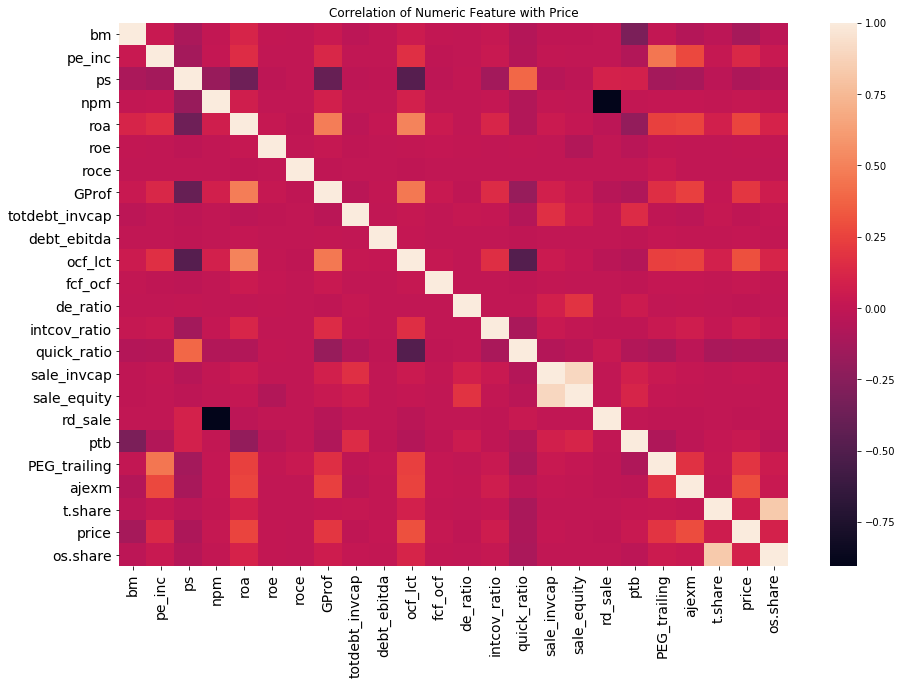

In [27]:
plt.figure(figsize = (15,10))
plt.title("Correlation of Numeric Feature with Price")
plt.xticks(size = 14)
plt.yticks(size = 14)
sns.heatmap(correlation)

In [28]:
cleandf.head()

,gvkey,date,bm,pe_inc,ps,npm,roa,roe,roce,GProf,...,sale_equity,rd_sale,ptb,PEG_trailing,tic,ajexm,t.share,price,os.share,date_ym
0,1078,20100131,0.279,14.386,2.736,0.187,0.199,0.300,0.211,0.422,...,1.562,0.091,3.838,0.370,ABT,1.0,124583688.0,52.94,1.546738e+09,2010-01
1,1078,20100228,0.273,14.710,2.739,0.187,0.190,0.285,0.200,0.381,...,1.346,0.095,3.687,0.277,ABT,1.0,145547692.0,54.28,1.552643e+09,2010-02
2,1078,20100331,0.273,14.276,2.659,0.187,0.190,0.285,0.200,0.381,...,1.346,0.095,3.579,0.269,ABT,1.0,193315098.0,52.68,1.552643e+09,2010-03
3,1078,20100430,0.273,13.864,2.582,0.187,0.190,0.285,0.200,0.381,...,1.346,0.095,3.475,0.261,ABT,1.0,173553969.0,51.16,1.552643e+09,2010-04
4,1078,20100531,0.257,13.988,2.313,0.167,0.193,0.259,0.199,0.405,...,1.495,0.094,3.519,0.228,ABT,1.0,209347194.0,47.56,1.543565e+09,2010-05


In [29]:
cleandf['gvkey'].nunique()

747

In [30]:
roa_order_df = cleandf.groupby("gvkey", as_index = False)["roa"].agg({"mean_roa":"mean"})
roa_order_df = roa_order_df.sort_values(by = "mean_roa",ascending = False)
roa_order_df

,gvkey,mean_roa
34,129441,0.785889
395,24878,0.655008
176,177287,0.541923
717,63863,0.398825
87,147849,0.398233
...,...,...
294,20621,NaN
560,32984,NaN
661,35375,NaN
672,35611,NaN


Text(0.5, 1.0, 'Stock with highest average monthly ROA (GVKEY)')

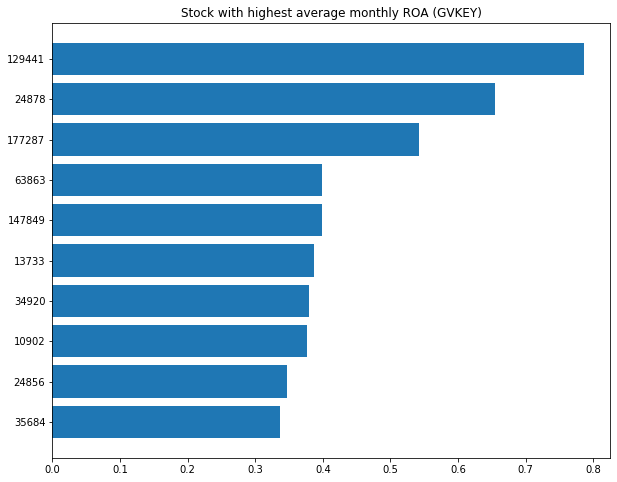

In [31]:
# top 5
top5_roa = roa_order_df[:10]
plt.figure(figsize = (10,8))
plt.barh(top5_roa["gvkey"][::-1],top5_roa["mean_roa"][::-1])
plt.title("Stock with highest average monthly ROA (GVKEY)")

In [44]:
def plot_stock_price(gvkey):
    '''
    gvkey is string type
    '''
    y = cleandf[cleandf["gvkey"] == gvkey]["price"]
    x = cleandf[cleandf["gvkey"] == gvkey]["date_ym"]
    
    # graph
    plt.figure(figsize = (20,10))
    plt.plot(x,y)
    plt.title("price of "+gvkey)
    plt.xticks(rotation = 45)

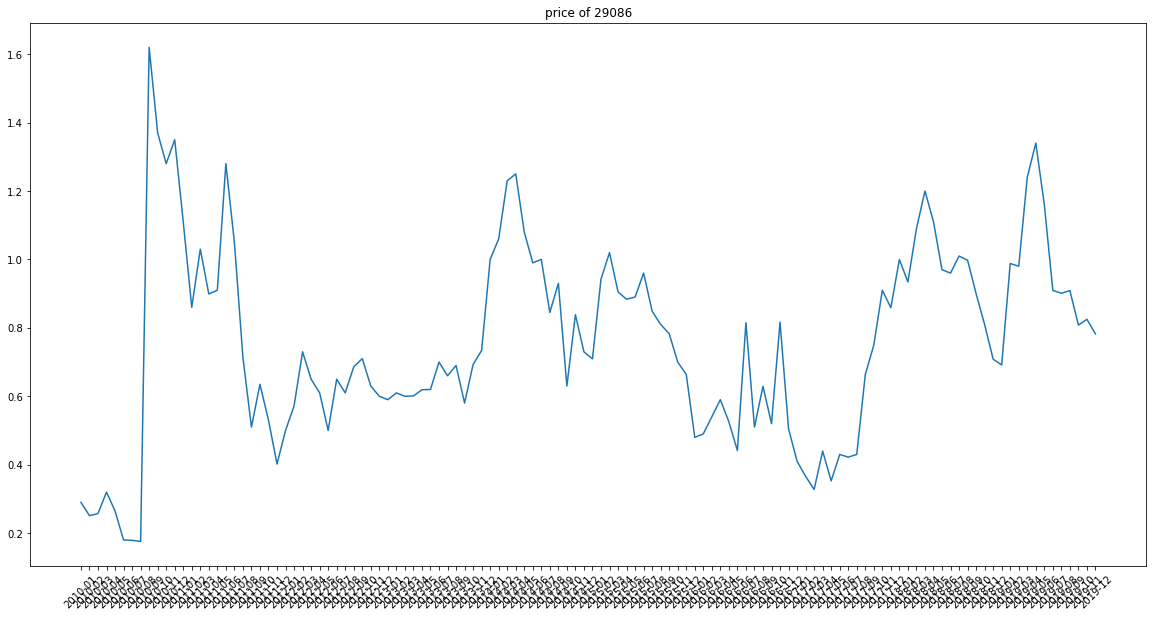

In [45]:
plot_stock_price("29086")

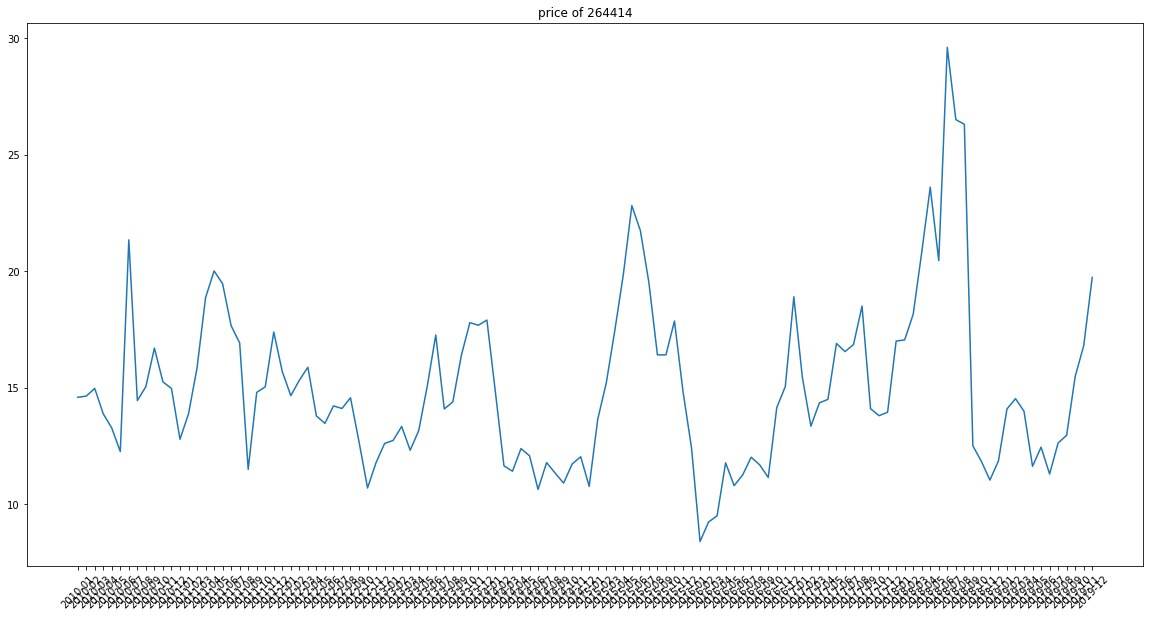

In [46]:
plot_stock_price("264414")

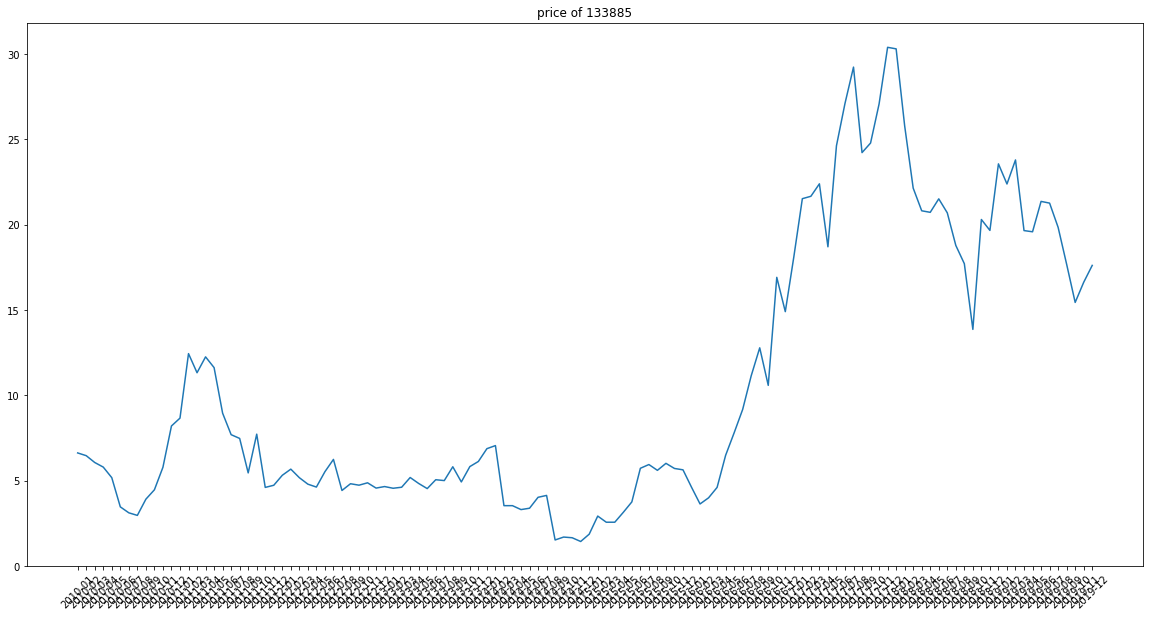

In [47]:
plot_stock_price("133885")